In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter

%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_excel('data/Canva_reviews.xlsx')
df.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [3]:
df.shape

(1500, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1500 non-null   object        
 1   userName              1500 non-null   object        
 2   userImage             1500 non-null   object        
 3   review                1500 non-null   object        
 4   score                 1500 non-null   int64         
 5   thumbsUpCount         1500 non-null   int64         
 6   reviewCreatedVersion  1500 non-null   object        
 7   at                    1500 non-null   datetime64[ns]
 8   replyContent          523 non-null    object        
 9   repliedAt             523 non-null    datetime64[ns]
 10  Sentiment             1500 non-null   object        
 11  Sub Category          1499 non-null   object        
 12  Sub Category_test     23 non-null     object        
dtypes: datetime64[ns](

In [5]:
df.nunique()

reviewId                1500
userName                1500
userImage               1500
review                  1500
score                      5
thumbsUpCount             26
reviewCreatedVersion      23
at                      1500
replyContent             457
repliedAt                523
Sentiment                  2
Sub Category               5
Sub Category_test          4
dtype: int64

## Data Analysis

In [6]:
df.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [7]:
df.loc[13, "Sentiment"]

'Negative'

In [8]:
df.loc[1495, "review"]

'Absolutely amazing and a lifesaver for teachers.'

In [9]:
df.loc[1495, "Sentiment"]

'Positive'

### Sentiment

In [10]:
df['Sentiment'].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

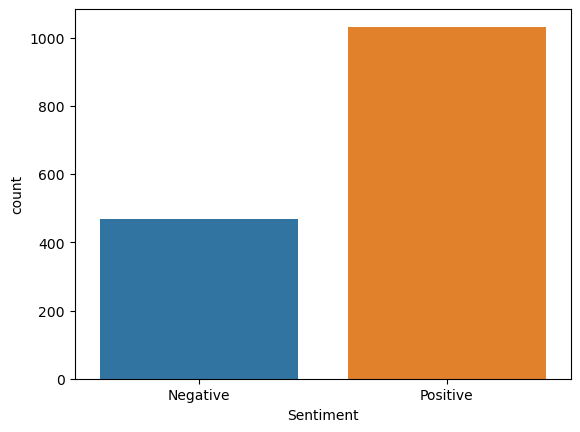

In [11]:
import seaborn as sns

sns.countplot(x='Sentiment', data=df)
plt.show()

### Score

In [12]:
df['score'].value_counts()

5    952
4    227
1    170
3     91
2     60
Name: score, dtype: int64

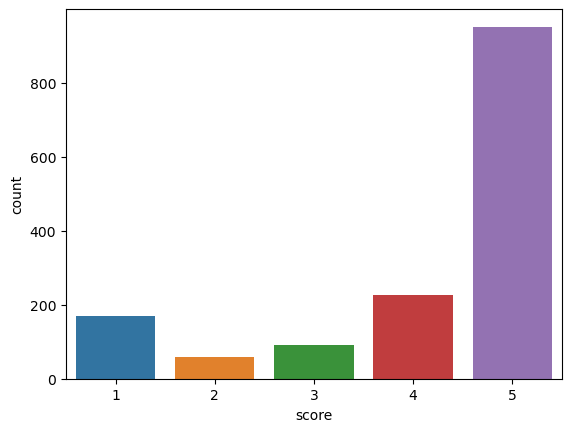

In [13]:
sns.countplot(x='score', data=df)
plt.show()

### Checking the relationship between `Score` and `Sentiment` 

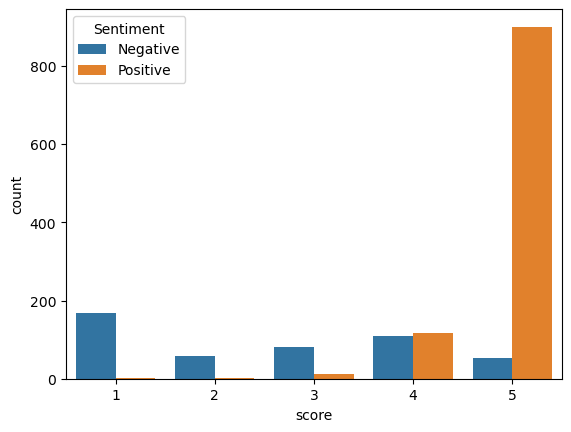

In [14]:
sns.countplot(x='score', data=df, hue='Sentiment')
plt.show()

### Review

In [15]:
df['review_len'] = df['review'].apply(len)

In [16]:
df['review_len'].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: review_len, dtype: float64

## Tokenization

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/oabas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/oabas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/oabas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df.head(2)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test,review_len
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality,481
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN,438


In [21]:
data = df[['review', 'Sentiment']]
data.head(2)

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive


### Convert the `reviews` to lowercase

In [22]:
reviews = list(data['review'])
reviews[13]

'Unable to save my work. Nothing works :('

In [23]:
len(reviews)

1500

In [24]:
reviews_lower = [r.lower() for r in reviews]
reviews_lower[13]

'unable to save my work. nothing works :('

-----

In [25]:
tokens = [word_tokenize(r) for r in reviews_lower]

In [26]:
tokens[13]

['unable', 'to', 'save', 'my', 'work', '.', 'nothing', 'works', ':', '(']

## Stopwords Removal

In [27]:
sw = stopwords.words("english")
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [28]:
# tokens = []
# for t in tokens:
#     new_t = []
#     for word in t:
#         if word not in sw:
#             new_t.append(word)
#     tokens.append(new_t)

tokens = [[word for word in t if word not in sw] for t in tokens]

In [29]:
tokens[13]

['unable', 'save', 'work', '.', 'nothing', 'works', ':', '(']

In [30]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers', '.']

### Removing Punctuations

In [31]:
tokenizer = RegexpTokenizer(r'\w+')

tokenizer.tokenize("wasn't")

['wasn', 't']

In [32]:
t = tokenizer.tokenize("wasn't")

In [33]:
"".join(t)

'wasnt'

In [34]:
tokenizer.tokenize(":")

[]

In [35]:
tokens = [["".join(tokenizer.tokenize(word)) for word in t
          if len(tokenizer.tokenize(word))>0] for t in tokens]

# new_tokens = []
# for t in tokens:
#     new_t = []
#     for word in t:
#         tokenized_word = tokenizer.tokenize(word)
#         if len(tokenized_word) > 0:
#             new_word = "".join(tokenized_word)
#             new_t.append(new_word)
#     new_tokens.append(new_t)

In [36]:
tokens[13]

['unable', 'save', 'work', 'nothing', 'works']

In [37]:
tokens[1495]

['absolutely', 'amazing', 'lifesaver', 'teachers']

## Stemming

`Stemming` is a process in NLP that involves reducing words to their root or base form, which is called the "stem". The `stem` is a normalized version of the word that can help to improve text analysis by reducing the number of unique words that need to be considered. Stemming is often used as a preprocessing step before text analysis tasks such as sentiment analysis or topic modeling.

In [38]:
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [39]:
porter.stem("teachers")

'teacher'

In [40]:
lancaster.stem('teachers')

'teach'

In [41]:
tokens = [[porter.stem(word) for word in t] for t in tokens]
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [42]:
reviews[13]

'Unable to save my work. Nothing works :('

## Word count distribution

In [43]:
# flat_tokens = [word for t in tokens for word in t]
flat_tokens = []
for t in tokens:
    for word in t:
        flat_tokens.append(word)

In [44]:
len(flat_tokens)

13782

In [45]:
# unique tokens
counts = Counter(flat_tokens)
len(counts)

1720

In [46]:
# most common tokes
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('s', 240),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184)]

## Bag of Words (BoW)

`BoW` is a method for representing text data as a collection of words, disregarding their order, grammar, or structure, and focusing only on their frequency of occurrence in a text corpus.

In [47]:
tokens[13]

['unabl', 'save', 'work', 'noth', 'work']

In [48]:
# Combine the tokens
" ".join(tokens[13])

'unabl save work noth work'

In [49]:
# we choosing 5 as the threshold as we don't have much datasets. 
clean_reviews = [" ".join(t) for t in tokens]
vect = CountVectorizer(binary=True, min_df=5)

X = vect.fit_transform(clean_reviews)

In [50]:
X.shape

(1500, 413)

In [51]:
# Unique words in the vocabulary
len(vect.vocabulary_)

413

### Convert the sparse matrix to array

In [52]:
type(X)

scipy.sparse._csr.csr_matrix

In [53]:
X_a = X.toarray()
X_a.shape

(1500, 413)

In [54]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
X_a[13,:].sum()

4

In [56]:
clean_reviews[13]

'unabl save work noth work'

In [59]:
data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x=="Positive" else 0)
y = data['Sentiment']

/var/folders/0c/_mtbsk_x4238bbw22x165tlm0000gn/T/ipykernel_42202/215404360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].apply(lambda x: 1 if x=="Positive" else 0)


In [61]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Build a Logistic Regression model

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)

In [63]:
accuracy_score(y_train, train_pred)

0.9608333333333333

In [64]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.89

In [66]:
# Save both the vectorizer and the model

with open("Output/binary_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

### Bag of words without binary

In [67]:
vect = CountVectorizer(min_df=5)

X = vect.fit_transform(clean_reviews)
X_a = X.toarray()

In [68]:
X_a[13,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
X_a[13,401]

2

In [70]:
X_a[13,:].sum()

5

In [71]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
accuracy_score(y_train, train_pred)

0.9566666666666667

In [73]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8833333333333333

## N-Grams

`n-grams` are contiguous sequences of n items from a given text, where the items can be characters, words, or other linguistic units.

For example, a 2-gram (also called a bigram) of the sentence `The quick brown fox jumps over the lazy dog` would be a sequence of two consecutive words at a time, resulting in the following bigrams: `The quick`, `quick brown`, `brown fox`, `fox jumps`, `jumps over`, `over the`, `the lazy`, and `lazy dog`. Similarly, a 3-gram (also called a trigram) would generate sequences of three consecutive words at a time.

In [74]:
vect = CountVectorizer(min_df=5, ngram_range=(1,3))

X = vect.fit_transform(clean_reviews)
X_a = X.toarray()

In [75]:
X.shape

(1500, 666)

In [76]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [77]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
accuracy_score(y_train, train_pred)

0.9716666666666667

In [78]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8933333333333333

In [79]:
# Save both the vectorizer and the model

with open("Output/n_gram.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("Output/n_gram_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## TF-IDF

In [80]:
vect = TfidfVectorizer(min_df=5)

X = vect.fit_transform(clean_reviews)
X.shape

(1500, 413)

In [81]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
accuracy_score(y_train, train_pred)

0.935

In [82]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8766666666666667

`N-grams` gave the best accuracy, so we would be loading a new data and see how it performs.

## Predictions

In [83]:
# Sample test reviews
test_review_1 = '''this is a truly amazing app , best for those who have content but don't know how to 
express it in a good and shareable manner. Thanks Team Canva for such a great app.'''

test_review_2 = '''Its the worst app ever I save my design lts not save'''

In [84]:
# Load the `n-gram` model and it's vectorizer
vect = pickle.load(open("Output/n_gram.pkl", "rb"))
model = pickle.load(open("Output/n_gram_lr.pkl", "rb"))

In [85]:
# Convert the reviews to a batch of one record
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

In [86]:
# Convert the text to lower case
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

In [87]:
# Tokenize the text
tokens_1 = [word_tokenize(r) for r in test_review_1]
tokens_2 = [word_tokenize(r) for r in test_review_2]

In [88]:
# Remove Stopwords
tokens_1 = [[word for word in t if word not in sw] for t in tokens_1]
tokens_2 = [[word for word in t if word not in sw] for t in tokens_2]

In [89]:
# Remove Punctuations
tokens_1 = [["".join(tokenizer.tokenize(word)) for word in t
            if len(tokenizer.tokenize(word))>0] for t in tokens_1]

tokens_2 = [["".join(tokenizer.tokenize(word)) for word in t
            if len(tokenizer.tokenize(word))>0] for t in tokens_2]

In [90]:
# Stemming
tokens_1 = [[porter.stem(word) for word in t] for t in tokens_1]
tokens_2 = [[porter.stem(word) for word in t] for t in tokens_2]

In [91]:
tokens_1

[['truli',
  'amaz',
  'app',
  'best',
  'content',
  'nt',
  'know',
  'express',
  'good',
  'shareabl',
  'manner',
  'thank',
  'team',
  'canva',
  'great',
  'app']]

In [92]:
test_review_1

["this is a truly amazing app , best for those who have content but don't know how to \nexpress it in a good and shareable manner. thanks team canva for such a great app."]

In [93]:
tokens_2

[['worst', 'app', 'ever', 'save', 'design', 'lt', 'save']]

In [94]:
test_review_2

['its the worst app ever i save my design lts not save']

In [95]:
# Join the tokens to form a sentence
clean_review_1 = [" ".join(review) for review in tokens_1]
clean_review_2 = [" ".join(review) for review in tokens_2]

In [96]:
# Transform the text using vectorizer and make predictions
# review 1
X_test = vect.transform(clean_review_1)
X_test.shape

(1, 666)

In [97]:
model.predict_proba(X_test)

array([[0.00441452, 0.99558548]])

In [98]:
model.predict(X_test)

array([1])

It predicted a `positive review` which is correct

In [99]:
# review 2
X_test = vect.transform(clean_review_2)
X_test.shape

(1, 666)

In [100]:
model.predict_proba(X_test)

array([[0.87775701, 0.12224299]])

In [101]:
model.predict(X_test)

array([0])

It predicted a `negative review` which is correct